*Modelo Exponecial*


Modelo exponencial: C(t) = 5.7264 * exp(-0.000788 * t)
C(2100) = 1.0949 mol/L


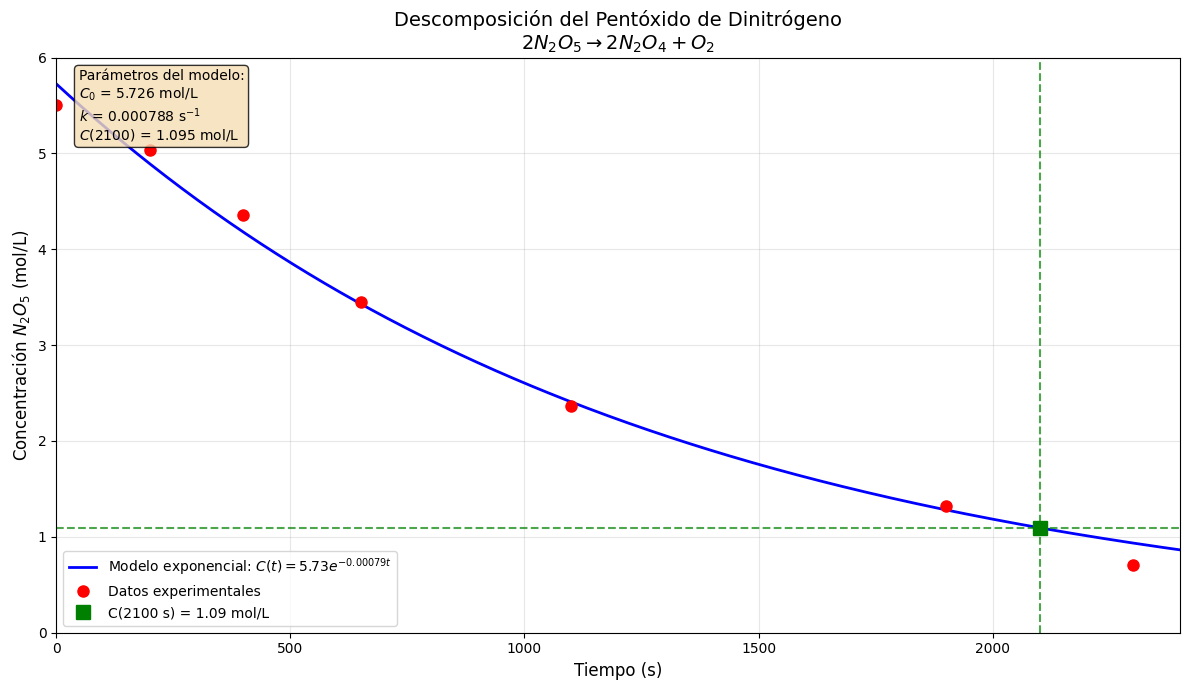


Tabla de concentraciones predichas:
Tiempo (s)   C (mol/L)   
------------------------
0            5.7264      
500          3.8619      
1000         2.6045      
1500         1.7565      
2000         1.1846      
2100         1.0949      
2300         0.9353      


In [2]:
#@title Descomposición química – Modelo exponencial

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Ajuste exponencial C = a * exp(-k*t)
def exp_model(t, a, k):
    return a * np.exp(-k * t)

# Datos experimentales
t_data = np.array([0, 200, 400, 650, 1100, 1900, 2300])
C_data = np.array([5.5, 5.04, 4.36, 3.45, 2.37, 1.32, 0.71])

# Ajuste del modelo exponencial
popt, pcov = curve_fit(exp_model, t_data, C_data, p0=[5.5, 0.001])
a, k = popt

print(f"Modelo exponencial: C(t) = {a:.4f} * exp(-{k:.6f} * t)")
print(f"C(2100) = {exp_model(2100, *popt):.4f} mol/L")

# Crear puntos para la curva continua
t_continuous = np.linspace(0, 2400, 500)
C_continuous = exp_model(t_continuous, *popt)

# Punto de interés a 2100 s
t_target = 2100
C_target = exp_model(t_target, *popt)

# Gráfico
plt.figure(figsize=(12, 7))

# Curva del modelo ajustado
plt.plot(t_continuous, C_continuous, 'b-', linewidth=2, label=f'Modelo exponencial: $C(t) = {a:.2f}e^{{-{k:.5f}t}}$')

# Datos experimentales
plt.plot(t_data, C_data, 'ro', markersize=8, label='Datos experimentales')

# Punto interpolado a 2100 s
plt.plot(t_target, C_target, 'gs', markersize=10, label=f'C(2100 s) = {C_target:.2f} mol/L')
plt.axvline(x=t_target, color='g', linestyle='--', alpha=0.7)
plt.axhline(y=C_target, color='g', linestyle='--', alpha=0.7)

# Configuración del gráfico
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Concentración $N_2O_5$ (mol/L)', fontsize=12)
plt.title('Descomposición del Pentóxido de Dinitrógeno\n$2N_2O_5 \\rightarrow 2N_2O_4 + O_2$', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 2400)
plt.ylim(0, 6)

# Añadir caja de texto con los resultados
textstr = f'Parámetros del modelo:\n$C_0$ = {a:.3f} mol/L\n$k$ = {k:.6f} s$^{{-1}}$\n$C(2100)$ = {C_target:.3f} mol/L'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)



# Tabla de valores en puntos clave
print("\n" + "="*50)
print("Tabla de concentraciones predichas:")
print("="*50)
print(f"{'Tiempo (s)':<12} {'C (mol/L)':<12}")
print("-"*24)
for t in [0, 500, 1000, 1500, 2000, 2100, 2300]:
    C_val = exp_model(t, *popt)
    print(f"{t:<12} {C_val:<12.4f}")